# Course: MSIS-678 Knowledge Discovery & Data Warehousing
# Data Science Using Python And R Exercise
#Professor: Edward (Ted) Kreutzer 
#Student: Jun Bao

# CHAPTER 6 DECISION TREES

For Exercises 21–27, work with the loans_training and loans_test data sets. Use either Python or R to solve each problem.
21. Create a CART model using the training data set that predicts Approval using Debt to Income Ratio, FICO Score, and Request Amount. Visualize the decision tree. Describe the first few splits in the decision tree.

In [95]:
import numpy as np
import pandas as pd
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools
import matplotlib.pyplot as plt


In [96]:
# import the data set
loan_train = pd.read_csv('Loans_Training')
loan_test = pd.read_csv('Loans_Test')

In [3]:
# save the approval variable (target) as y
y = loan_train[['Approval']]
# save the other 3 variable (predictor) as x
x = loan_train[['Debt-to-Income Ratio', 'FICO Score', 'Request Amount']]
# run the CART algorithm
cart01 = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5).fit(x,y)
# using the export_graphviz() command to obtain the tree structure
export_graphviz(cart01, out_file='/Users/joanna/DSHomeWork/Ch6dot/cart01.dot')
# use the predict() command to obtain the classifications of the approval variable
preApprovalCART = cart01.predict(x)
# concatenate the prediction to the end of trainning data set
preApprovalCARTdf = pd.DataFrame(preApprovalCART)
preresult = pd.concat((loan_train, preApprovalCARTdf), axis=1)
# export the predcition result file
preresult.to_csv('preresult')
preresult

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest,0
0,F,0.00,397,1000,450.0,F
1,F,0.00,403,500,225.0,F
2,F,0.00,408,1000,450.0,F
3,F,0.00,408,2000,900.0,F
4,F,0.00,411,5000,2250.0,F
...,...,...,...,...,...,...
150297,T,0.38,709,19000,8550.0,F
150298,T,0.38,722,17000,7650.0,F
150299,T,0.38,747,11000,4950.0,F
150300,T,0.39,679,10000,4500.0,F


In [4]:
'''The first node is the split of if variable FICO Score <= 659.5, the result displays in the second level of the nodes. The right node of the second level split further by the first variable Debt-to-Income Ratio<=0.305, and the result displays in the third level.'''

'The first node is the split of if variable FICO Score <= 659.5, the result displays in the second level of the nodes. The right node of the second level split further by the first variable Debt-to-Income Ratio<=0.305, and the result displays in the third level.'

22. Develop a CART model using the test data set that uses the same target and predictor variables. Visualize the decision tree. Investigate the splits in the decision tree. Does the tree built using the test data match the tree built using the training data?

In [5]:
# save the approval variable (target) as y_ts
y_ts = loan_test[['Approval']]
# save the other 3 variable (predictor) as x_ts
x_ts = loan_test[['Debt-to-Income Ratio', 'FICO Score', 'Request Amount']]
# run the CART algorithm
cart02 = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5).fit(x_ts,y_ts)
# using the export_graphviz() command to obtain the tree structure
export_graphviz(cart02, out_file='/Users/joanna/DSHomeWork/Ch6dot/cart02.dot')
# use the predict() command to obtain the classifications of the approval variable
preApprovalCART = cart02.predict(x_ts)


In [6]:
'''The first node is the split of if variable FICO Score <= 660.5, the result displays in the second level of the nodes. The right node of the second level split further by the the first variable Debt-to-Income Ratio<=0.305, and the result displays in the third level.'''

'The first node is the split of if variable FICO Score <= 660.5, the result displays in the second level of the nodes. The right node of the second level split further by the the first variable Debt-to-Income Ratio<=0.305, and the result displays in the third level.'

23. Build a C5.0 model using the training data set that predicts Approval using Debt to Income Ratio, FICO Score, and Request Amount. Specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

In [7]:
# using DecisionTreeClassifier() command to build a C5.0 model
c50_01 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1000).fit(x,y)
# using export_graphviz() command to export the summary of the C5.0 tree
export_graphviz(c50_01, out_file='/Users/joanna/DSHomeWork/Ch6dot/c50_01.dot')
# using the predict() command to obtain the classifications of each record in the training data set
c50_01.predict(x)


array(['F', 'F', 'F', ..., 'F', 'F', 'F'], dtype=object)

In [8]:
'''The first split is done by variable FICO Score<=656.5 and the result displays in the second level. In the second level, the left node was split by variable FICO Score<=644.5, the right node was split by variable Debt-to-Income Ratio<=0.315'''

'The first split is done by variable FICO Score<=656.5 and the result displays in the second level. In the second level, the left node was split by variable FICO Score<=644.5, the right node was split by variable Debt-to-Income Ratio<=0.315'

24. How does your C5.0 model compare to your CART model for the loans_training data? Describe the similarities and differences.

In [9]:
'''Similarity: the first node was split by FICO Score<=656.5
Differences: 1. C5.0 model splits much more levels than CART model
2. In the second level, the left node was not split in CART model, but split in C5.0model
3. In the second level, the right node was split by same variables but different variable value, the CART model by variable Debt-to-Income Ratio<=0.305, and the C5.0model by Debt-to-Income Ratio<=0.315'''

'Similarity: the first node was split by FICO Score<=656.5\nDifferences: 1. C5.0 model splits much more levels than CART model\n2. In the second level, the left node was not split in CART model, but split in C5.0model\n3. In the second level, the right node was split by same variables but different variable value, the CART model by variable Debt-to-Income Ratio<=0.305, and the C5.0model by Debt-to-Income Ratio<=0.315'

25. Create a C5.0 model using the test data set that utilizes the same target variable, pre- dictor variables, and minimum cases criterion. Visualize the decision tree. Does the tree built using the test data match the tree built using the training data?


In [10]:
# using DecisionTreeClassifier() command to build a C5.0 model
c50_02 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1000).fit(x_ts, y_ts)
# using export_graphviz() command to export the summary of the c5.0 tree
export_graphviz(c50_02, out_file='/Users/joanna/DSHomeWork/Ch6dot/c50_02.dot')
# using the predict() command to obtain the classifications of each record in the training data set
c50_02.predict(x_ts)

array(['F', 'F', 'F', ..., 'F', 'F', 'F'], dtype=object)

In [11]:
'''No, the tree built using the test data is different with the tree built using the training data.'''

'No, the tree built using the test data is different with the tree built using the training data.'

26. Use random forests on the training data set to obtain the predicted value of Approval using the same predictor variables as in the CART and C5.0 models.

In [12]:
# build random forests from the training data set in CART model
# using numpy's ravel() command to create a one-dimensional array
rfy = np.ravel(y)
# use the RandomForestClassifier() command to create the random forest
rf01 = RandomForestClassifier(n_estimators=100, criterion='gini').fit(x,rfy)
# using the predict() command to obtain the classifications of each record in the training data set by the random forests algorithm
rf01_result = rf01.predict(x)


In [13]:
# build random forests from the training data set in C5.0 model
# using numpy's ravel() command to create a one-dimensional array
rfy_c5 = np.ravel(y)
# use the RandomForestClassifier() command to create the random forest
rf01_c5 = RandomForestClassifier(n_estimators=100, criterion='entropy').fit(x,rfy_c5)
# using the predict() command to obtain the classifications of each record in the training data set by the random forests algorithm
rf01_c5.predict(x)


array(['F', 'F', 'F', ..., 'T', 'T', 'T'], dtype=object)

27. Use random forests on the test data set to obtain the predicted value of Approval in the test data set. Build a table comparing the predictions from the training and test data sets. How do they compare?

In [14]:
# build random forests from the test data set in CART model
# using numpy's ravel() command to create a one-dimensional array
rfy_ts = np.ravel(y_ts)
# use the RandomForestClassifier() command to create the random forest
rf01_ts = RandomForestClassifier(n_estimators=100, criterion='gini').fit(x_ts,rfy_ts)
# using the predict() command to obtain the classifications of each record in the training data set by the random forests algorithm
rf01_ts_result = rf01_ts.predict(x_ts)

rf01_ts_result

array(['F', 'F', 'F', ..., 'T', 'T', 'T'], dtype=object)

In [89]:
# 根据老师的答案：
pd.DataFrame(rf01_ts_result)[0].value_counts() / len(rf_test)

T    0.512013
F    0.487987
Name: 0, dtype: float64

In [91]:
# 根据老师的答案：
# contigency table:
pd.crosstab(loan_test['Approval'],rf01_ts_result, colnames=['Prediction Approval'])

Prediction Approval,F,T
Approval,,
F,23918,1016
T,334,24430


In [15]:
# convert the predictions of random forests from training and test datas to dataframes
rf01_df = pd.DataFrame(rf01_result)
rf01_ts_df = pd.DataFrame(rf01_ts_result)
# concatenate the predictions from traning data set to the end of loan_train dataset
concat_tr_predict = pd.concat([loan_train, rf01_df.rename(columns={0:'rf_tr'})], axis=1)
# concatenate the predictions from test data set to the end of loan_train dataset
concat_ts_predict = pd.concat([loan_test, rf01_ts_df.rename(columns={0:'rf_ts'})], axis=1)

concat_tr_predict.to_csv('concat_tr_predict')
concat_ts_predict.to_csv('concat_ts_predict')

concat_tr_predict

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest,rf_tr
0,F,0.00,397,1000,450.0,F
1,F,0.00,403,500,225.0,F
2,F,0.00,408,1000,450.0,F
3,F,0.00,408,2000,900.0,F
4,F,0.00,411,5000,2250.0,F
...,...,...,...,...,...,...
150297,T,0.38,709,19000,8550.0,T
150298,T,0.38,722,17000,7650.0,T
150299,T,0.38,747,11000,4950.0,T
150300,T,0.39,679,10000,4500.0,T


In [16]:
concat_ts_predict

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest,rf_ts
0,F,0.00,413,2000,900.0,F
1,F,0.00,449,1000,450.0,F
2,F,0.00,454,6000,2700.0,F
3,F,0.00,456,1000,450.0,F
4,F,0.00,457,1000,450.0,F
...,...,...,...,...,...,...
49693,T,0.38,662,14000,6300.0,T
49694,T,0.38,664,16000,7200.0,T
49695,T,0.38,676,4000,1800.0,T
49696,T,0.38,680,6000,2700.0,T


In [17]:
'''The prediction of approval are the same as the orignial data set variable Approval value'''

'The prediction of approval are the same as the orignial data set variable Approval value'

In [18]:
# Question 27 (Solution from professor老师的答案)
# Use random forests on the test data set to obtain the predicted value of Approval in the test data set. 
# Build a table comparing the predictions from the training and test data sets. 
# How do they compare? 

# save target variable
y = loan_test[['Approval']]
X = loan_test[['Debt-to-Income Ratio','FICO Score','Request Amount']]

# specify names of matrix and the target variable
X_names = X.columns
y_names = list(set(y['Approval']))

# format for random forest model
rfy = np.ravel(y)

# train random forest model
rf02 = RandomForestClassifier(n_estimators = 100, criterion="gini").fit(X,rfy)

# return predictions
rf_test = rf02.predict(X)

# predictions
pd.DataFrame(rf_test)[0].value_counts() / len(rf_test)

# contingency table
pd.crosstab(loan_test['Approval'],rf_test)

# The model performance was similar with the training RF model had an overall accuracy of 94.2% and the RF test dataset had an accuracy of 97.3%

col_0,F,T
Approval,,
F,23930,1004
T,344,24420


For Exercises 28–34, work with the bank_marketing_training and bank_marketing_test data sets. Use either Python or R to solve each problem.
28. Create a CART model using the training data set that predicts Response using whatever predictors you think appropriate. Visualize the decision tree. Describe the first few splits in the decision tree.

In [19]:
# import the data set
bank_train = pd.read_csv('bank_marketing_training')
bank_test = pd.read_csv('bank_marketing_test')

In [20]:
# save the response variable (target) as y
y_bkt = bank_train[['response']]
# save the other 3 variable (predictor) as x
x_bkt = bank_train[['age', 'campaign', 'previous']]
# specify each names on each of columns of x and y to help use to visualize the CART model  
x_names = ['age', 'campaign', 'previous']
y_names = ['yes', 'no']
# run the CART algorithm
cart03 = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=8).fit(x_bkt,y_bkt)
# using the export_graphviz() command to obtain the tree structure
export_graphviz(cart03, out_file='/Users/joanna/DSHomeWork/Ch6dot/cart03.dot', feature_names=x_names, class_names=y_names)
# use the predict() command to obtain the classifications of the approval variable
cart03.predict(x_bkt)


array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [21]:
'''The node split by the variable previous<=1.5, the yes response displays on the left node in the second level and the no response displays on the right node in the second level'''

'The node split by the variable previous<=1.5, the yes response displays on the left node in the second level and the no response displays on the right node in the second level'

29. Develop a CART model using the test data set and the same target and predictor vari- ables. Visualize the decision tree. Investigate the splits in the decision tree. Does the tree built using the test data match the tree built using the training data?

In [22]:
# save the response variable (target) as y
y_bkts = bank_test[['response']]
# save the other 3 variable (predictor) as x
x_bkts = bank_test[['age', 'campaign', 'previous']]
# specify each names on each of columns of x and y to help use to visualize the CART model  
x_names = ['age', 'campaign', 'previous']
y_names = ['yes', 'no']
# run the CART algorithm
cart04 = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=8).fit(x_bkts,y_bkts)
# using the export_graphviz() command to obtain the tree structure
export_graphviz(cart04, out_file='/Users/joanna/DSHomeWork/Ch6dot/cart04.dot', feature_names=x_names, class_names=y_names)
# use the predict() command to obtain the classifications of the approval variable
cart04.predict(x_bkts)


array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [23]:
'''Yes, they are exactly the same.'''

'Yes, they are exactly the same.'

30. Build a C5.0 model using the training data set that predicts Response and the same target and predictor variables. Specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

In [24]:
# using DecisionTreeClassifier() command to build a C5.0 model
c50_03 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1000).fit(x_bkt,y_bkt)
# using export_graphviz() command to export the summary of the C5.0 tree
export_graphviz(c50_03, out_file='/Users/joanna/DSHomeWork/Ch6dot/c50_03.dot', feature_names=x_names, class_names=y_names)
# using the predict() command to obtain the classifications of each record in the training data set
c50_03.predict(x_bkt)


array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [25]:
'''There is 11 levels of nodes. The first node was split by variable privious<=0.5, the yes value in response rariable was displayed on the left side of the second level, and the no value in respose variable was displayed on the right side of the second level.  '''

'There is 11 levels of nodes. The first node was split by variable privious<=0.5, the yes value in response rariable was displayed on the left side of the second level, and the no value in respose variable was displayed on the right side of the second level.  '

31. How does your C5.0 model compare to your CART model for the bank_marketing_ training data? Describe the similarities and differences.

In [26]:
'''Similarity: the first node split both by varialbe previous. the left node on the second split by variable age. 
Differences: the trees were split into different levels by different models. The sample size and criteria on each leaf are differnt by different model.'''

'Similarity: the first node split both by varialbe previous. the left node on the second split by variable age. \nDifferences: the trees were split into different levels by different models. The sample size and criteria on each leaf are differnt by different model.'

32. Create a C5.0 model using the test data set that utilizes the same target variable, predictor variables, and minimum cases criterion. Visualize the decision tree. Does the tree built using the test data match the tree built using the training data?

In [27]:
# using DecisionTreeClassifier() command to build a C5.0 model
c50_04 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1000).fit(x_bkts,y_bkts)
# using export_graphviz() command to export the summary of the C5.0 tree
export_graphviz(c50_04, out_file='/Users/joanna/DSHomeWork/Ch6dot/c50_04.dot', feature_names=x_names, class_names=y_names)
# using the predict() command to obtain the classifications of each record in the training data set
c50_04.predict(x_bkts)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [28]:
'''Yes, they are exactly the same.'''

'Yes, they are exactly the same.'

33. Use random forests on the training data set to obtain the predicted value of Response using the same predictor variables as in the CART and C5.0 models.

In [29]:
# build random forests from the training data set using gini as criterion
# using numpy's ravel() command to create a one-dimensional array
rfy_bkt = np.ravel(y_bkt)
# use the RandomForestClassifier() command to create the random forest
rf02 = RandomForestClassifier(n_estimators=100, criterion='gini').fit(x_bkt,rfy_bkt)
# using the predict() command to obtain the classifications of each record in the training data set by the random forests algorithm
rf02_bktrain_predict = rf02.predict(x_bkt)

34. Use random forests on the test data set to obtain the predicted value of Response in the test data set. Build a table comparing the predictions from the training and test data sets. How do they compare?

In [30]:
# build random forests from the test data set using gini as criterion
# using numpy's ravel() command to create a one-dimensional array
rfy_bkts = np.ravel(y_bkts)
# use the RandomForestClassifier() command to create the random forest
rf03 = RandomForestClassifier(n_estimators=100, criterion='gini').fit(x_bkts,rfy_bkts)
# using the predict() command to obtain the classifications of each record in the training data set by the random forests algorithm
rf03_bktest_predict = rf03.predict(x_bkt)

In [31]:
# convert the predictions of random forests from training and test datas to dataframes
rf02_bktrain_predict_df = pd.DataFrame(rf02_bktrain_predict)
rf03_bktest_predict_df = pd.DataFrame(rf03_bktest_predict)
# concatenate the predictions from both traning data set and test data set to the end of bank_train dataset
concat_bkr_bkts_predict = pd.concat([bank_train, rf02_bktrain_predict_df.rename(columns={0:'training set predic'}), rf03_bktest_predict_df.rename(columns={0:'test set predic'})], axis=1)

concat_bkr_bkts_predict.to_csv('concat_bkr_bkts_predict.csv')
concat_bkr_bkts_predict

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,training set predic,test set predic
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,no,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,no,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,no,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,no,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no,no,no
26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,no,no
26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,success,-1.1,94.767,-50.8,1.028,4963,no,no,no
26872,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,yes,yes


For Exercises 35–41, work with the training and test data sets that you obtained by partitioning the Churn data set in the Chapter 5 Exercises. Use either Python or R to solve each problem.
35. Create a CART model using the training data set that predicts Churn using whatever predictors you think appropriate. Visualize the decision tree. Describe the first few splits in the decision tree.

In [32]:
# import the data set
churn = pd.read_csv('churn')

In [33]:
# partition the data set
churn_train, churn_test = train_test_split(churn, test_size=0.33, random_state=7)
churn.shape, churn_train.shape, churn_test.shape

((3333, 22), (2233, 22), (1100, 22))

In [34]:
# build the CART model for training data set
# save the variable Churn (target) as y
y_ctr = churn_train[['Churn']]
# save the variable Account Length and CustServ Calls (predictor) as x
x_ctr = churn_train[['Account Length', 'CustServ Calls']]
# specify the names of each column of x and y
x_names = ['Account Length', 'CustServ Calls']
y_names = ['True', 'False']
# run the CART algorithm
cart05 = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5).fit(x_ctr, y_ctr)
# use the export_graphviz() command to obtain the tree structure
export_graphviz(cart05, out_file='/Users/joanna/DSHomeWork/Ch6dot/cart05.dot', feature_names=x_names, class_names=y_names)
# use the predict() command to obtain the classifications of the Churn variable for every variable in the training data set
predChurnCART = cart05.predict(x_ctr)


In [35]:
'''The first node was split by variable CustServ Calls<=3.5. In the second lever, the left node dose not split further, the right node split by variable CustServ Calls<=4.5'''

'The first node was split by variable CustServ Calls<=3.5. In the second lever, the left node dose not split further, the right node split by variable CustServ Calls<=4.5'

36. Develop a CART model using the test data set and the same target and predictor variables. Visualize the decision tree. Investigate the splits in the decision tree. Does the tree built using the test data match the tree built using the training data?

In [36]:
# build the CART model for test data set
# save the variable Churn (target) as y
y_cts = churn_test[['Churn']]
# save the variable Account Length and CustServ Calls (predictor) as x
x_cts = churn_test[['Account Length', 'CustServ Calls']]
# specify the names of each column of x and y
x_names = ['Account Length', 'CustServ Calls']
y_names = ['True', 'False']
# run the CART algorithm
cart06 = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5).fit(x_cts, y_cts)
# use the export_graphviz() command to obtain the tree structure
export_graphviz(cart06, out_file='/Users/joanna/DSHomeWork/Ch6dot/cart06.dot', feature_names=x_names, class_names=y_names)
# use the predict() command to obtain the classifications of the Churn variable for every variable in the training data set
predChurnCART = cart06.predict(x_cts)


In [37]:
'''The tree are different. The tree built using training set has 5 levels, and built using test set has 4 levels. Starting from second level, the leafs are different.'''

'The tree are different. The tree built using training set has 5 levels, and built using test set has 4 levels. Starting from second level, the leafs are different.'

37. Build a C5.0 model using the training data set that predicts Churn and the same target and predictor variables. Specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

In [38]:
# build a C5.0 model using traning data set
# using the DecisionTreeClassifier() command to obtain the decision tree using entropy as a splitting criterion
c50_05 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1000).fit(x_ctr, y_ctr)
# run the export_graphviz() command to export the summary of the C5.0 tree
export_graphviz(c50_05, out_file='/Users/joanna/DSHomeWork/Ch6dot/c50_05.dot', feature_names=x_names, class_names=y_names)
# run the predict() command on the name of the saved output to obtain the classifications of ech record in the training data set
predChurnC50_tr = c50_05.predict(x_ctr)

In [39]:
'''There are two levels of nodes. The first node split by variable Account Lenth<=96.5. In the second level, the left node displays entropy=0.575, the right node displays entrpy=0.608'''

'There are two levels of nodes. The first node split by variable Account Lenth<=96.5. In the second level, the left node displays entropy=0.575, the right node displays entrpy=0.608'

38. How does your C5.0 model compare to your CART model for the churn_training data? Describe the similarities and differences.

In [40]:
'''The trees built from C5.0 model and CART model are quite different, no similarity at all.'''

'The trees built from C5.0 model and CART model are quite different, no similarity at all.'

39. Create a C5.0 model using the test data set that utilizes the same target variable, pre- dictor variables, and minimum cases criterion. Visualize the decision tree. Does the tree built using the test data match the tree built using the training data?

In [41]:
# build a C5.0 model using test data set
# using the DecisionTreeClassifier() command to obtain the decision tree using entropy as a splitting criterion
c50_06 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1000).fit(x_cts, y_cts)
# run the export_graphviz() command to export the summary of the C5.0 tree
export_graphviz(c50_06, out_file='/Users/joanna/DSHomeWork/Ch6dot/c50_06.dot', feature_names=x_names, class_names=y_names)
# run the predict() command on the name of the saved output to obtain the classifications of ech record in the training data set
predChurnC50_ts = c50_06.predict(x_cts)

In [42]:
'''There is only one node, no split happened. The tree from test data set is different with the ree from training set. At least, the tree from training set has 1 split and 2 levels of the nodes.'''

'There is only one node, no split happened. The tree from test data set is different with the ree from training set. At least, the tree from training set has 1 split and 2 levels of the nodes.'

40. Use random forests on the training data set to obtain the predicted value of Churn using the same predictor variables as in the CART and C5.0 models.

In [43]:
# build random forests from the training data set using gini as criterion
# using numpy's ravel() command to create a one-dimensional array
rfy_ctr = np.ravel(y_ctr)
# use the RandomForestClassifier() command to create the random forest
rf04 = RandomForestClassifier(n_estimators=100, criterion='gini').fit(x_ctr,rfy_ctr)
# using the predict() command to obtain the classifications of each record in the training data set by the random forests algorithm
rf04_ctrain_predict = rf04.predict(x_ctr)

41. Use random forests on the test data set to obtain the predicted value of Churn in the test data set. Build a table comparing the predictions from the training and test data sets. How do they compare?

In [44]:
# build random forests from the test data set using gini as criterion
# using numpy's ravel() command to create a one-dimensional array
rfy_cts = np.ravel(y_cts)
# use the RandomForestClassifier() command to create the random forest
rf05 = RandomForestClassifier(n_estimators=100, criterion='gini').fit(x_cts,rfy_cts)
# using the predict() command to obtain the classifications of each record in the training data set by the random forests algorithm
rf05_ctest_predict = rf05.predict(x_cts)


In [45]:
# convert the predictions of random forests from training and test datas to dataframes
rf04_ctrain_predict_df = pd.DataFrame(rf04_ctrain_predict)
rf05_ctest_predict_df = pd.DataFrame(rf05_ctest_predict)
# concatenate the predictions from traning data set to the end of churn_train dataset
concat_ctr_predict = pd.concat([churn_train, rf04_ctrain_predict_df.rename(columns={0:'training set predic'})], axis=1)
# concatenate the predictions from test data set to the end of churn_test dataset
concat_cts_predict = pd.concat([churn_test, rf05_ctest_predict_df.rename(columns={0:'test set predic'})], axis=1)

concat_ctr_predict.to_csv('concat_ctr_predict.csv')
concat_cts_predict.to_csv('concat_cts_predict.csv')

concat_ctr_predict

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Old Churn,Churn,training set predic
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False.,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.90,...,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False.,False,False
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False.,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,OH,96.0,415.0,347-6812,no,no,0.0,106.6,128.0,18.12,...,178.9,92.0,8.05,14.9,7.0,4.02,1.0,False.,False,NaN
3327,SC,79.0,415.0,348-3830,no,no,0.0,134.7,98.0,22.90,...,221.4,128.0,9.96,11.8,5.0,3.19,2.0,False.,False,NaN
3328,AZ,192.0,415.0,414-4276,no,yes,36.0,156.2,77.0,26.55,...,279.1,83.0,12.56,9.9,6.0,2.67,2.0,False.,False,NaN
3329,WV,68.0,415.0,370-3271,no,no,0.0,231.1,57.0,39.29,...,191.3,123.0,8.61,9.6,4.0,2.59,3.0,False.,False,NaN


In [46]:
concat_cts_predict

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Old Churn,Churn,test set predic
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False.,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False.,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,WY,89.0,415.0,378-6924,no,no,0.0,115.4,99.0,19.62,...,280.9,112.0,12.64,15.9,6.0,4.29,3.0,False.,False,NaN
3321,VT,60.0,415.0,400-2738,no,no,0.0,193.9,118.0,32.96,...,210.1,134.0,9.45,13.2,8.0,3.56,3.0,False.,False,NaN
3322,MD,62.0,408.0,409-1856,no,no,0.0,321.1,105.0,54.59,...,180.5,72.0,8.12,11.5,2.0,3.11,4.0,True.,True,NaN
3330,RI,28.0,510.0,328-8230,no,no,0.0,180.8,109.0,30.74,...,191.9,91.0,8.64,14.1,6.0,3.81,2.0,False.,False,NaN


# CHAPTER 8 NAÏVE BAYES CLASSIFICATION

For the following exercises, work with the framingham_nb_training and framingham_nb_ test data sets. Use either Python or R to solve each problem.
24. Convert all variables (Death, Sex, and Educ) to factors.

In [47]:
# import the data set
fram_tr = pd.read_csv('framingham_nb_training.csv')
fram_ts = pd.read_csv('framingham_nb_test.csv')

In [48]:
# convart all varialbes in traing data set and test data set to dummy variables
death_ind = np.array(fram_tr['Death'])
(death_ind, death_ind_dict) = stattools.categorical(death_ind,drop=True,dictnames=True)
death_ind = pd.DataFrame(death_ind)

sex_ind = np.array(fram_tr['Sex'])
(sex_ind, sex_ind_dict) = stattools.categorical(sex_ind,drop=True,dictnames=True)
sex_ind = pd.DataFrame(sex_ind)

educ_ind = np.array(fram_tr['Educ'])
(educ_ind, educ_ind_dict) = stattools.categorical(educ_ind,drop=True,dictnames=True)
educ_ind = pd.DataFrame(educ_ind)
educ_ind

death_ind_test = np.array(fram_ts['Death'])
(death_ind_test, death_ind__testdict) = stattools.categorical(death_ind_test,drop=True,dictnames=True)
death_ind_test = pd.DataFrame(death_ind_test)

sex_ind_test = np.array(fram_ts['Sex'])
(sex_ind_test, sex_ind_test_dict) = stattools.categorical(sex_ind_test,drop=True,dictnames=True)
sex_ind_test = pd.DataFrame(sex_ind_test)

educ_ind_test = np.array(fram_ts['Educ'])
(educ_ind_test, educ_ind_test_dict) = stattools.categorical(educ_ind_test,drop=True,dictnames=True)
educ_ind_test = pd.DataFrame(educ_ind_test)
educ_ind_test


,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
995,1.0,0.0,0.0,0.0
996,1.0,0.0,0.0,0.0
997,0.0,0.0,1.0,0.0
998,0.0,1.0,0.0,0.0


25. Create two contingency tables,one with Death and Sex and another with Death and Educ.

In [49]:
t1 = pd.crosstab(fram_tr['Death'], fram_tr['Sex'])
t1['Total'] = t1.sum(axis=1)
t1.loc['Total'] = t1.sum()

t2 = pd.crosstab(fram_tr['Death'], fram_tr['Educ'])
t2['Total'] = t2.sum(axis=1)
t2.loc['Total'] = t2.sum()

t1, t2

(Sex      1    2  Total
 Death                 
 0      184  266    450
 1      308  242    550
 Total  492  508   1000,
 Educ     1    2    3   4  Total
 Death                          
 0      173  146   84  47    450
 1      287  135   80  48    550
 Total  460  281  164  95   1000)

26. Use the tables in the previous exercise to calculate:
a. The probability a randomly selected person is alive or is dead.

In [50]:
550/1000

0.55

In [51]:
'''The probability is 45%'''

'The probability is 45%'

b. The probability a randomly selected person is a male.

In [52]:
492/1000

0.492

In [53]:
'''The probability is 49.2%'''

'The probability is 49.2%'

c. The probability a randomly selected person has an Educ value of 3.

In [54]:
164/1000

0.164

In [55]:
'''The probability is 16.4%'''

'The probability is 16.4%'

d. The probabilities that a dead person is male with education level 1, and that a living person is male with education level 1.

In [56]:
# probability for dead, male and education 1 
0.55*0.164*(460/1000)

0.04149200000000001

In [57]:
# probability for living, male and education 1 
(1-0.55)*0.164*(460/1000)

0.033948

e. The probabilities that a living person is female with education level 2, and that a dead person is female with education level 2.

In [58]:
# probability for living, female, education 2
(450/1000)*(492/1000)*(281/1000)

0.06221340000000001

In [59]:
# probability for dead, female, education 2
(550/1000)*(492/1000)*(281/1000)

0.07603860000000001

27. Create side‐by‐side bar graphs for Death, one with an overlay of Sex and the other with an overlay of Educ.

In [60]:
t_death_sex = pd.crosstab(fram_tr['Death'], fram_tr['Sex'])
t_sex_educ = pd.crosstab(fram_tr['Death'], fram_tr['Educ'])
t_death_sex, t_sex_educ


(Sex      1    2
 Death          
 0      184  266
 1      308  242,
 Educ     1    2   3   4
 Death                  
 0      173  146  84  47
 1      287  135  80  48)

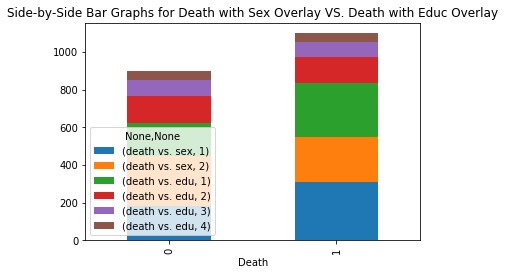

In [61]:
# Plot the bar graph (need help here, how to plot a side-by-side bar with overlays?)
pd.concat({'death vs. sex':t_death_sex, 'death vs. edu':t_sex_educ} , axis=1)\
.plot.bar(stacked=True, title='Side-by-Side Bar Graphs for Death with Sex Overlay VS. Death with Educ Overlay')

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

<Figure size 432x288 with 0 Axes>

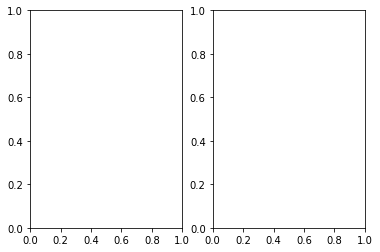

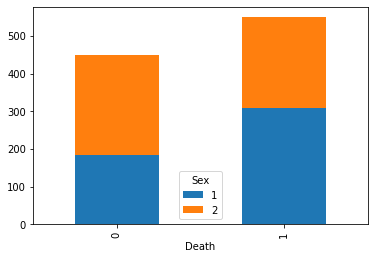

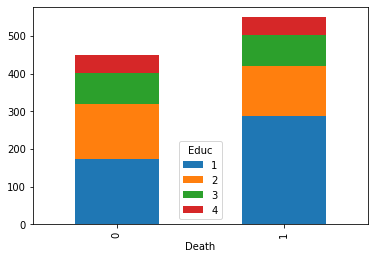

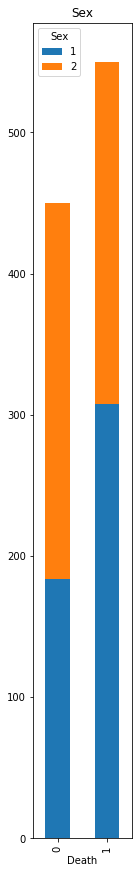

In [101]:
# Answer from Professor
#27. Create side‐by‐side bar graphs for Death, one with an overlay of Sex and the other with
#    an overlay of Educ.
fig = plt.figure()
fig, (ax1,ax2) = plt.subplots(1,2, sharex = True)
#ax1 = ds_norm.plot(kind='bar', stacked=True)
#ax2 = de_norm.plot(kind='bar', stacked=True)
ax1 = t_death_sex.plot(kind='bar', stacked=True)
ax2 = t_sex_educ.plot(kind='bar', stacked=True)

plt.figure()
ax1 = plt.subplot(131)
#ax1.plot(ds_norm.plot(ax = ax1, kind='bar', stacked=True, figsize=(6,15), title='Sex'))
ax1.plot(t_death_sex.plot(ax = ax1, kind='bar', stacked=True, figsize=(6,15), title='Sex'))

ax2 = plt.subplot(132)
#ax2.plot(de_norm.plot(ax = ax2, kind='bar', stacked=True, figsize=(6,20), title='Education'))
ax2.plot(t_sex_educ.plot(ax = ax2, kind='bar', stacked=True, figsize=(6,20), title='Education'))



# example data
x = np.arange(0.1, 4, 0.1)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.1 * np.sqrt(x)


# Now switch to a more OO interface to exercise more features.
#fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
#ax = axs[0]
#ax.bar() = ds_norm.plot.bar(stacked=True)
#ax.set_title('all errorbars')


#ax = axs[1]
#ax.bar(x, y, yerr=yerr)
#ax.set_title('only every 5th errorbar')


#fig.suptitle('Errorbar subsampling for better appearance')

plt.show()


28. Use the graphs from the previous exercise to answer the following questions:
a. If we know a person is dead, are they more likely to be male or female?

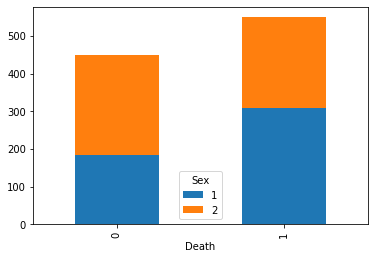

In [62]:
t_death_sex.plot.bar(stacked=True)

In [63]:
'''The person is more likely to be male.'''

'The person is more likely to be male.'

b. If we know a person is alive, are they more likely to be male or female?

In [64]:
'''The person is more likely to be female.'''

'The person is more likely to be female.'

c. If we know a person is dead, what education level are they most likely to have?

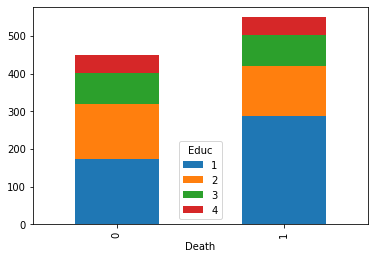

In [65]:
t_sex_educ.plot.bar(stacked=True)

In [66]:
'''The person is most likely to have education level 1.'''

'The person is most likely to have education level 1.'

d. If we know a person is alive, what education level are they most likely to have?

In [67]:
'''education level 1'''

'education level 1'

e. Which education levels are more prevalent for dead persons? For living persons?

In [68]:
'''education level 1'''

'education level 1'

29. Compute the posterior probability of Death = 0 (person is living) for a male with edu- cation level 1. Compute the posterior probability of Death = 1 (person is dead) for a male with education level 1.

In [69]:
# posterior probability of Death = 0, male, education level 1
(450/1000)*(492/1000)*(460/1000)

0.101844

In [70]:
# posterior probability of Death = 1, male, education level 1
(550/1000)*(492/1000)*(460/1000)

0.124476

30. Compute the posterior probability of Death=0(person is living)for a female with edu- cation level 2. Compute the posterior probability of Death = 1 (person is dead) for a female with education level 2.

In [71]:
# posterior probability of Death = 0(person is living), female, education level 2
(450/1000)*(508/1000)*(281/1000)

0.0642366

In [72]:
# posterior probability of Death = 1(person is dead), female, education level 2
(550/1000)*(508/1000)*(281/1000)

0.07851140000000002

31. Run the Naïve Bayes classifier to classify persons as living or dead based on sex and education.

In [73]:
# save the predict variables as x
x = pd.concat((sex_ind, educ_ind), axis=1)
# save the target variable a y
y = fram_tr['Death']
# run the Native Bayes alogrithm
nb_01 = MultinomialNB().fit(x,y)


32. Evaluate the Naïve Bayes model on the framingham_nb_testdataset.Display th eresults in a contingency table. Edit the row and column names of the table to make the table more readable. Include a total row and column.

In [74]:
# test the Native Bayes estimator on the test data set
x_test = pd.concat((sex_ind_test, educ_ind_test), axis=1)
y_predicted = nb_01.predict(x_test)

# using contingency table to visualize the acutal and predicted death status 
ypred = pd.crosstab(fram_ts['Death'], y_predicted, rownames=['Actual'], colnames=['Predicted'])
ypred['Total'] = ypred.sum(axis=1)
ypred.loc['Total'] = ypred.sum()
ypred

Predicted,0,1,Total
Actual,,,
0,203,322,525
1,105,370,475
Total,308,692,1000


33. According to your table in the previous exercise, find the following values for the Naïve Bayes model:
a. Accuracy

In [75]:
# accuracy of the model
(203+370)/1000

0.573

In [76]:
# calcuate the baseline accuracy
fram_ts['Death'].value_counts()

0    525
1    475
Name: Death, dtype: int64

In [77]:
475/(525+475)

0.475

b. Error rate

In [78]:
# error rate: 1 - accuracy rate
1-0.573

0.42700000000000005

34. According to your contingency table,find the following values for the Naïve Bayes model:
a. How often it correctly classifies dead persons.

In [79]:
370/475

0.7789473684210526

b. How often it correctly classifies living persons.

In [80]:
203/525

0.38666666666666666